In [1]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

In [4]:
shuffle_index = np.random.permutation(len(x_train_flattened))
x_train_flattened, y_train = x_train_flattened[shuffle_index], y_train[shuffle_index]

In [5]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [6]:
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(x_train_flattened, y_train_2)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [7]:
train_accuracy = clf.score(x_train_flattened, y_train_2)
test_accuracy = clf.score(x_test_flattened, y_test_2)

In [8]:
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 0.9824
Test accuracy: 0.9800


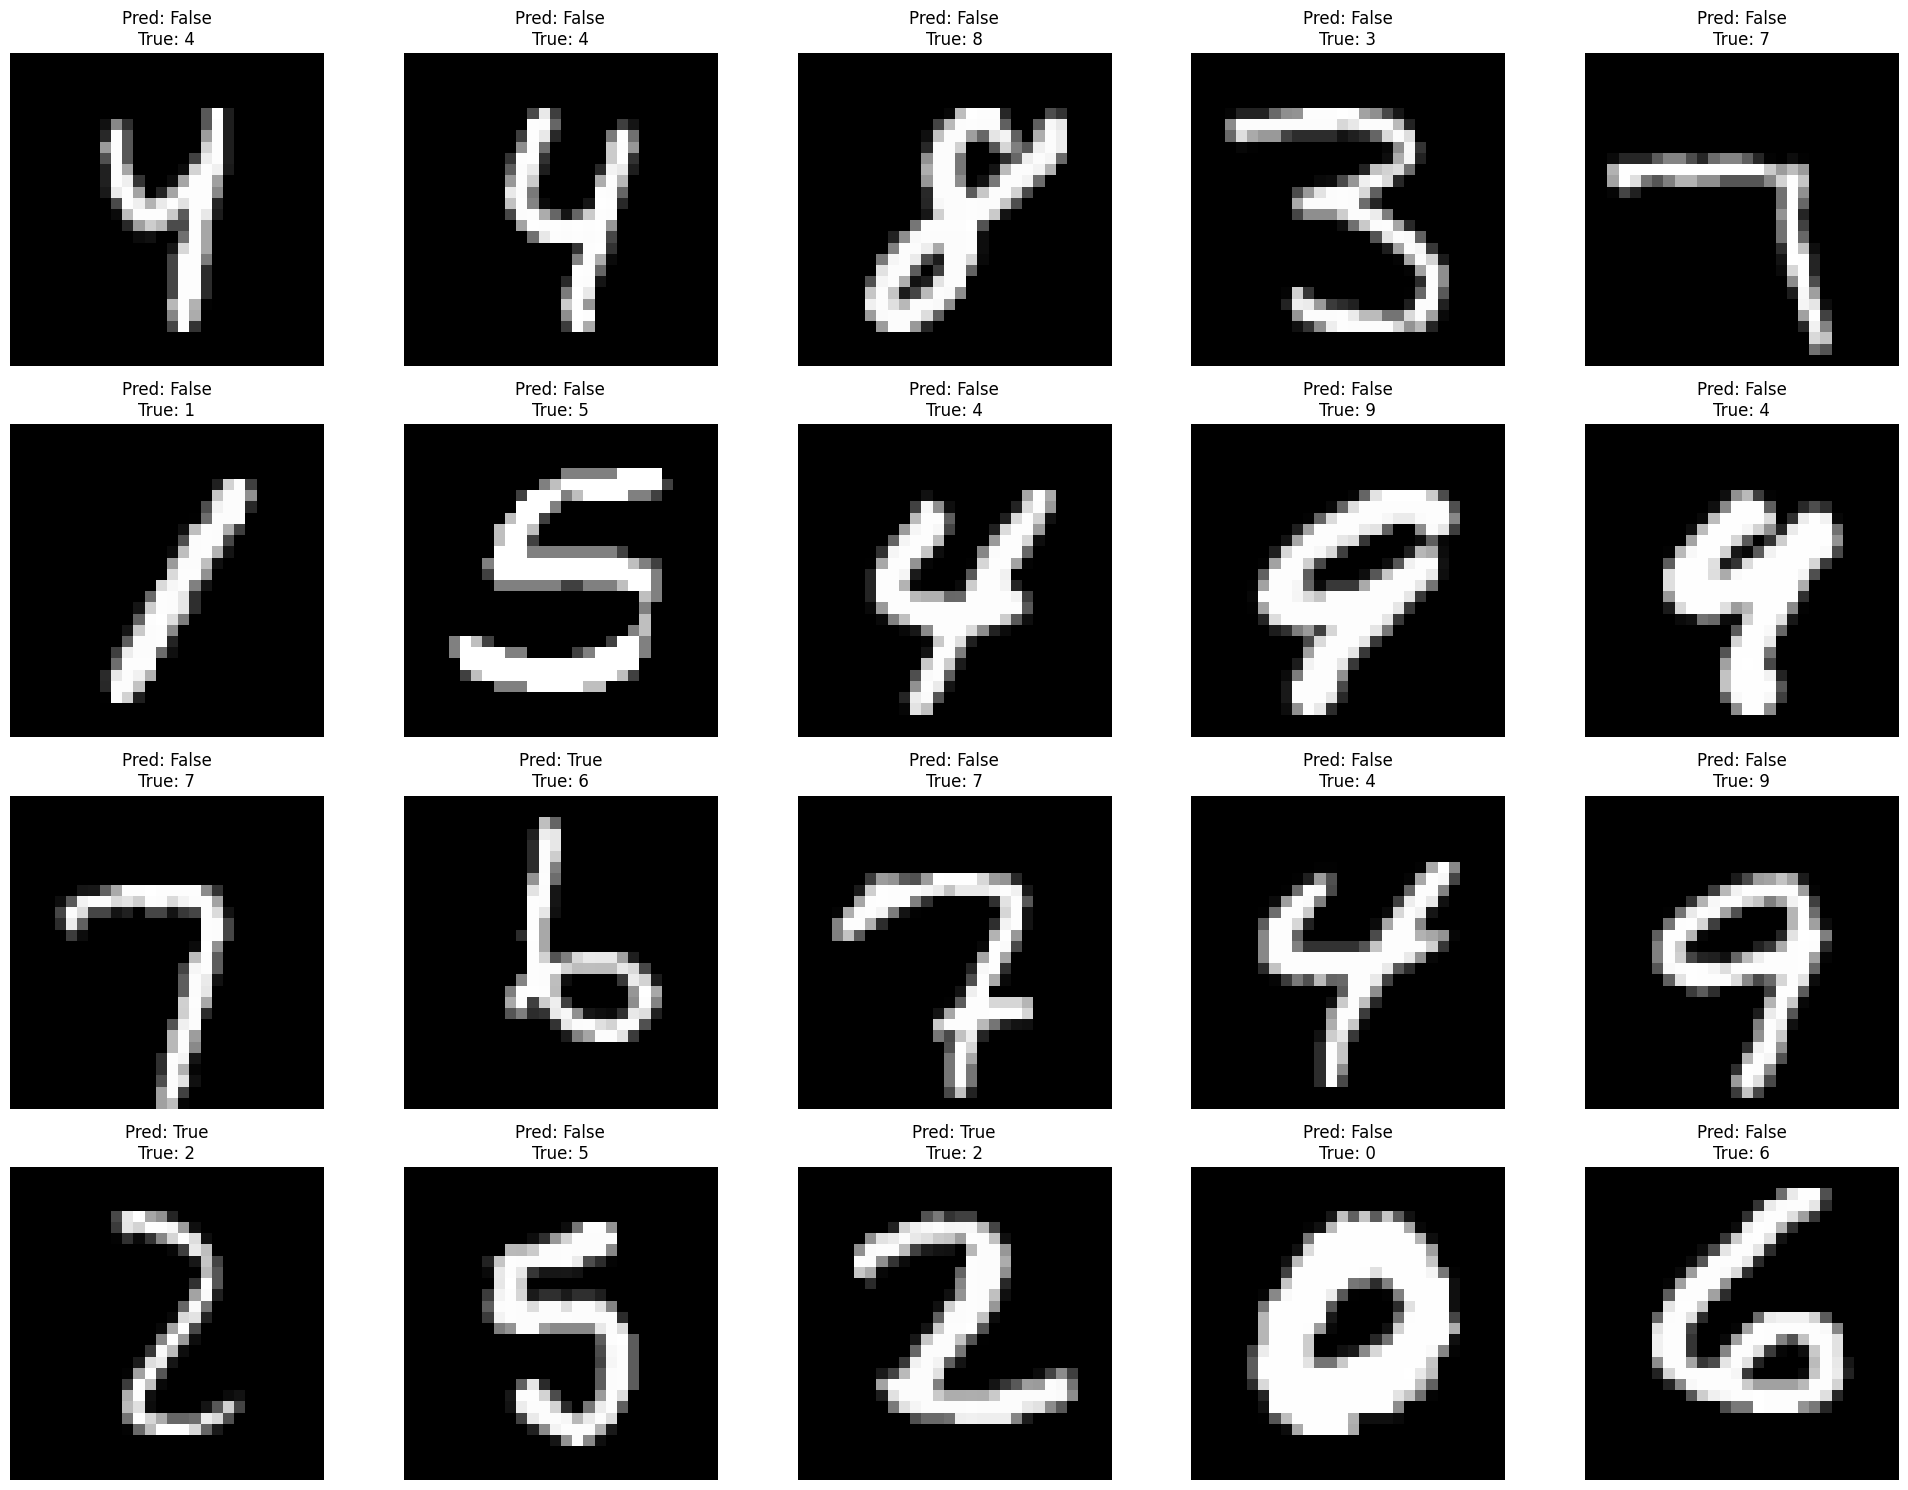

In [13]:
plt.figure(figsize=(20, 15))
num_images = 20
rows = 4
cols = 5

for i in range(num_images):
    plt.subplot(rows, cols, i+1)
    img_idx = np.random.randint(len(x_test))
    plt.imshow(x_test[img_idx], cmap='gray')
    pred = clf.predict(x_test_flattened[img_idx].reshape(1, -1))[0]
    true_label = y_test[img_idx]
    plt.title(f"Pred: {pred}\nTrue: {true_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test_flattened)
cm = confusion_matrix(y_test_2, y_pred)
print("\nConfusion Matrix:")
print(cm)
print("\nConfusion Matrix Interpretation:")
print(f"True Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")


Confusion Matrix:
[[8912   56]
 [ 144  888]]

Confusion Matrix Interpretation:
True Negatives: 8912
False Positives: 56
False Negatives: 144
True Positives: 888
